In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [2]:
import networkx as nx

from Classes.BiasedInfluenceGraph import *
from Classes.WordGenerator import *

# Opinion Evolution in network with bias function in R and M

In [56]:
import random

# Unique sigma value for each pair
sigma_values = {}

# Unique influence value for each pair
influence_values = {}

def get_unique_random_sigma_for_pair(e):
    if e not in sigma_values:
        sigma_values[e] = random.randrange(1,5)
    return sigma_values[e]

def get_unique_random_influence_for_pair(e):
    if e not in influence_values:
        influence_values[e] = random.uniform(0, 1)
    return influence_values[e]

def get_unique_random_influence_consensus_for_pair(e):
    if e not in influence_values:
        influence_values[e] = random.uniform(0, 1 / sigma_values[e])
    return influence_values[e]

def lin(G, e):
    sigma = get_unique_random_sigma_for_pair(e)
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return sigma * x

def ins(G,e):
    return 0

def random_inf(G, e):
    return get_unique_random_influence_for_pair(e)

def random_inf_consensus(G, e):
    return get_unique_random_influence_consensus_for_pair(e)

### Opinion evolution with linear bias function in R and M

False


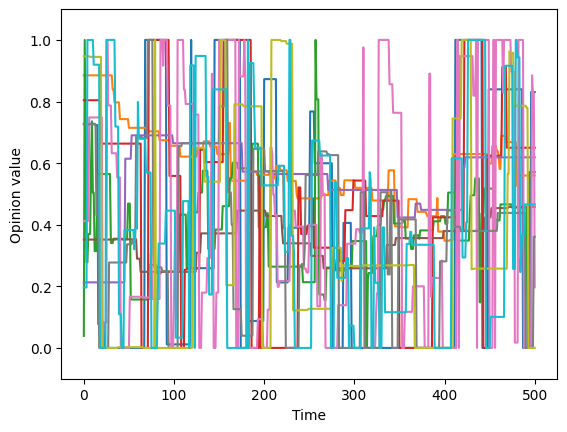

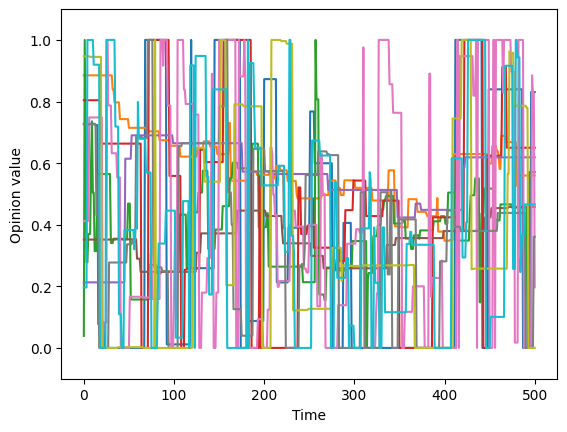

In [62]:
n = 10
p = 0.4
B0 = []

sigma_values = {}
influence_values = {}

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=random_inf,bias_fn=lin)

word_len = 50*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

Opinion evolution with linear bias function in R and M. $\sigma_{ji} \cdot I_{ij} < 1$. For every $\sigma_{ji} \in (0,1)$ the condition will always fulfilled, this is for every linear function in R.

True


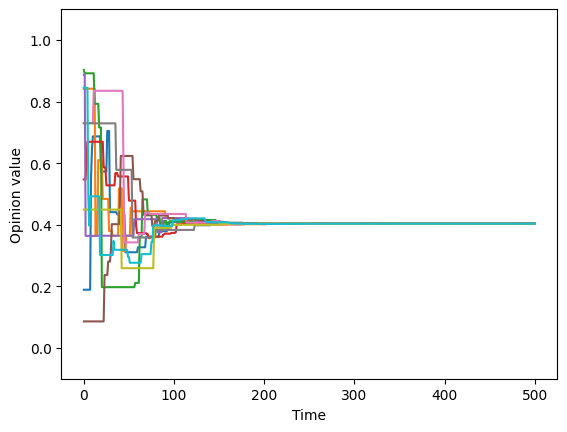

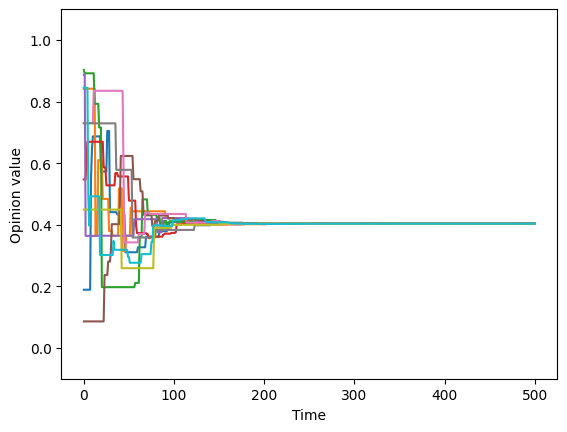

In [66]:
n = 10
p = 0.4
B0 = []

sigma_values = {}
influence_values = {}

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=random_inf_consensus,bias_fn=lin)

word_len = 50*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

## Opinion evolution with linear function (Regions R and M) and ins function (I)

Erdös-Renyi Graph with a random value of $I_{ij}$ and a random bias function between $ins$ and $lin$. 

In [67]:
bias_fn = {}
influence_values = {}

def random_lin_ins(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    if e not in bias_fn:
        bias_fn[e] = random.choices([lin, ins])[0]
    
    return bias_fn[e](G,e)

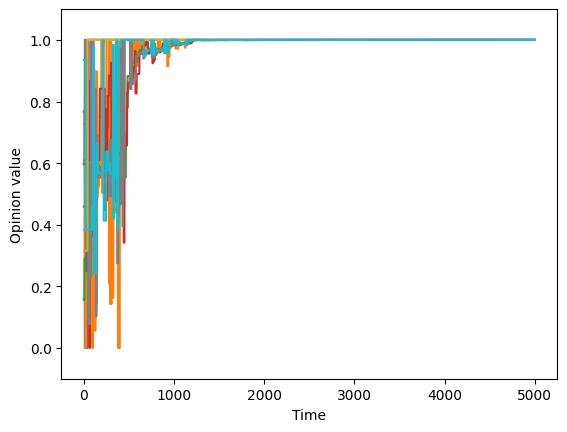

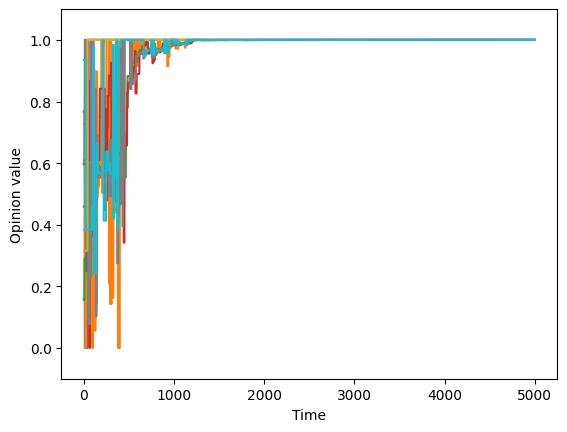

In [85]:
n = 10
p = 0.4
B0 = []

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=random_inf,bias_fn=random_lin_ins)

word_len = 500*n
w = generate_random_word(G, word_len)
G.execute_word(w)

G.plot_opinion_evolution()

Creating a strongly connected graph with agents wit bias function $lin$, where $\sigma_{ji} \cdot I_{ij} < 1$. Then, we complete the graph where the missing connections will have the $ins$ bias function.

In [ ]:
n = 10
p = 0.4

# Create graph
graph=nx.fast_gnp_random_graph(n, p, directed=True)
edges = graph.edges()

# Generate complete graph
k = nx.complete_graph(n,create_using=nx.DiGraph)
all_edges = k.edges()

# Find missing edges
missing_edges =  list(set(all_edges) - set(edges))

In [13]:
def lin_ins(G, e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    if e in edges:
        sigma = get_unique_random_sigma_for_pair(e)
        return sigma * x
    else:
        return 0
    
def get_unique_random_influence_for_pair_li(e):
    if e not in influence_values and e in edges:
        influence_values[e] = random.uniform(0, 1 / sigma_values[e])
    elif e not in influence_values:
        influence_values[e] = random.uniform(0, 1)
    return influence_values[e]

def random_inf_li(G, e):
    return get_unique_random_influence_for_pair_li(e)


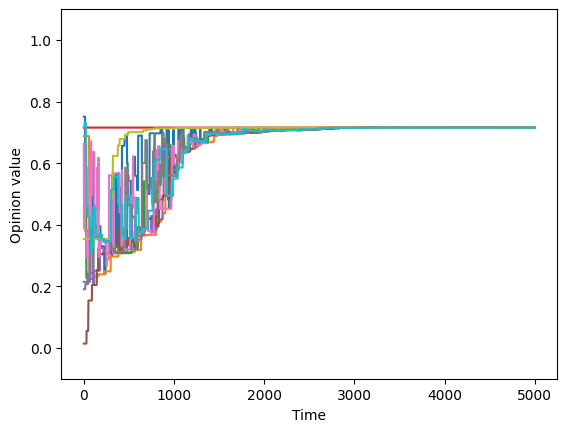

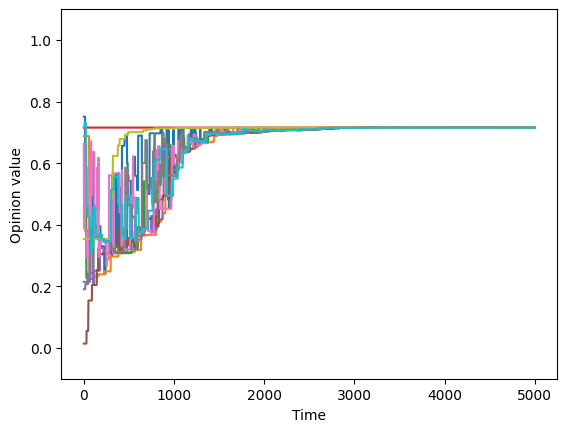

In [49]:
sigma_values = {}
influence_values = {}

B0 = []

G = BiasedInfluenceGraph(n,G=k, ops=B0, influence_fn=random_inf_li,bias_fn=lin_ins)

word_len = 500*n
w = generate_random_word(G, word_len)
G.execute_word(w)

G.plot_opinion_evolution()

## Opinion Evolution with bias function in all regions